In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
h = 6.62607015e-34 #Planck's constant in Js
h_eV = h/1.6022e-19 #Planck's constant in eVs
hbar = h/(2*np.pi) #reduced Planck's constant
m = 9.1093837e-31 #electron mass in kg
s = 10000 #iterator number where neccessary
a = 10 #length of box from -a/2 to a/2
j = cmath.sqrt(-1)
Eparticle = np.linspace(5e-41,5e-41,s) #J
well_potential = np.linspace(-5e-38,-1e-50,s) #J

In [2]:
def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) / f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) / f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) / f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)/2  # Think: why not `return c`?

In [3]:
np.set_printoptions(threshold=np.inf)
def KinEnergy(z_zeros):
    E = []
    for i in range(len(z_zeros)):
        z = z_zeros[i]
        num = (z**2)*(hbar**2)
        den = (2*m)*(a**2)
        KE = num/den
        E.append(KE)  
    return E
def k(Energy_array): #Finds an array of wave numbers k
    k = np.sqrt(2*m*(abs(Energy_array))/hbar**2)
    return k

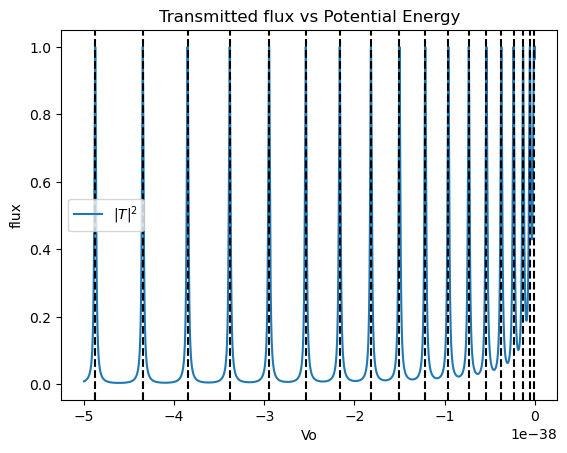

In [4]:
Eparticle = np.linspace(5e-41,5e-41,s) #J
well_potential = np.linspace(-5e-38,0,s) #J


Erange = [np.linspace(0.5e-41,0.5e-41,s),np.linspace(0.5e-42,0.5e-42,s),np.linspace(0.25e-42,0.25e-42,s),np.linspace(0.5e-43,0.5e-43,s),np.linspace(0.25e-43,0.25e-43,s)]

q_wellr = np.sqrt((2*m*(Eparticle-well_potential))/(hbar**2)) #in well wave number
k_wellr = k(Eparticle)

Tr = (2*k_wellr*q_wellr)/((2*k_wellr*q_wellr*np.cos(2*q_wellr*a)) + -1*j*(q_wellr**2 + k_wellr**2)*np.sin(2*q_wellr*a))
T_sqr = (np.abs(Tr))**2
plt.plot(well_potential, T_sqr, label = '$|T|^{2}$')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
#plt.ylim(0.5,1.05)
#plt.xlim(-1e-38,0)
#print(T_sq[4300])
#plt.xlim(-1e-38,0)

ints = np.arange(1,19,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
#print(E_maxT)
for i in range(len(VooT)):
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

In [5]:
np.set_printoptions(threshold=np.inf)
def KinEnergy(z_zeros):
    E = []
    for i in range(len(z_zeros)):
        z = z_zeros[i]
        num = (z**2)*(hbar**2)
        den = (2*m)*(a**2)
        KE = num/den
        E.append(KE)  
    return E
def l(Energy_array): #Finds an array of wave numbers k
    l = (1/hbar)*np.sqrt(2*m*(Energy_array - well_potential))
    return l
Eranget = np.linspace(well_potential[0]+1e-40, -1.1e-50,s)
#print(well_potential)
#print(Eranget[0])

for i in range(len(well_potential)):
    Eranget = np.linspace(well_potential[i]+1e-50, -1.1e-50,s) 
    def wave_l(Energy_array): #Finds an array of wave numbers k
        wave_nums = (1/hbar)*np.sqrt(2*m*(Energy_array - well_potential[i]))
        return wave_nums
    if i == 9999:
        #print()
        zranget = a*wave_l(Eranget)
        print(zranget[111]-zranget[110])
    #    break
#zo_Vot = (a/hbar)*np.sqrt(2*m*-1*(well_potential[0]))
#zranget = wave_l(Eranget)
#print(l(Eranget))
#print(-1.1e-50-well_potential[9999])

#plt.plot(zranget,Eranget)
#sumtin = np.sqrt((zo_Vot/zranget)**2 - 1)
#print(sumtin)
#plt.plot(zranget, np.tan(zranget))
#plt.ylim(-2,2)

-1.3599247187256628e-09


C:\Users\nienn\AppData\Local\Temp\ipykernel_11220\2308955306.py:21: RuntimeWarning: invalid value encountered in sqrt
  wave_nums = (1/hbar)*np.sqrt(2*m*(Energy_array - well_potential[i]))


C:\Users\nienn\AppData\Local\Temp\ipykernel_11220\3685542652.py:30: RuntimeWarning: invalid value encountered in sqrt
  sqrt = np.sqrt((zo_Vo2/z)**2 - 1)


Text(0, 0.5, 'Bound state energy nearest threshold')

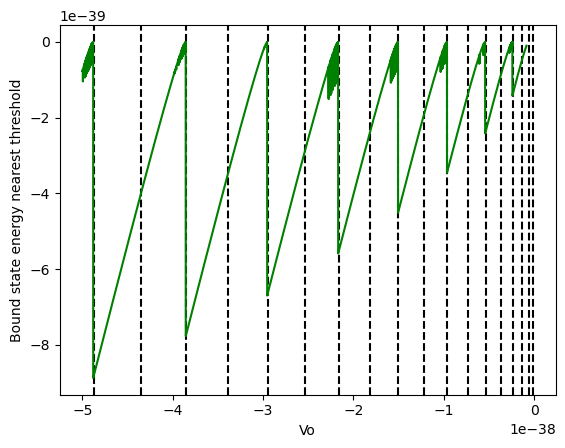

In [6]:
highest_z = []
for i in range(len(well_potential)-2):

#Calculate zo, z, and range to iterate over for a paticular Vo
    zo_Vo2 = (a/hbar)*np.sqrt(2*m*-1*(well_potential[i]))
    Erange2 = np.linspace(well_potential[i]+1e-40, -1e-60,s)
    def wave_l(Energy_array): #Finds an array of wave numbers k
        wave_nums = (1/hbar)*np.sqrt(2*m*(Energy_array - well_potential[i]))
        return wave_nums
    zrange2 = a*wave_l(Erange2)

    
#Ensure there are no negative square roots for the spline
    #validrange = []
    #for n in range(len(zrange2)):
     #   if ((zo_Vo2/(zrange2[n]))**2 - 1) > 0:
      #      validrange.append(zrange2[n])
      #  else:
      #      break
    #if len(validrange) < 1000:
     #   print(i)

#Build the spline off of the discrete ydiff function
  #  diffreal = (np.tan(validrange) - np.sqrt((zo_Vo2/validrange)**2 - 1))
  #  diff2 = scipy.interpolate.CubicSpline(validrange, diffreal)
    
    
    def y_diff2(z):
        tan = np.tan(z)
        sqrt = np.sqrt((zo_Vo2/z)**2 - 1)
        diff = tan - sqrt
        return diff  
    
#Iterate through all Vo's and find highest z -- highest eigenstate

    #plt.plot(zrange2,y_diff2(zrange2))

    #zeroline = np.linspace(0,20, s)
   # if i == 0:
        #print(zrange2)
        #plt.plot(zrange2, y_diff2(zrange2), color = 'gold')
    #    plt.plot(zrange2, np.zeros_like(zrange2), color = 'black')
    #if i > 3800:
     #   break

   # if 9831 <= i <= 9999:
    #    plt.plot(zrange2,y_diff2(zrange2))    
    #if i == 8070:
    #    plt.plot(zrange2,y_diff2(zrange2))     
    if 0 <= i <= 240:
        z_maximum = bisection(y_diff2,28,zrange2[-1])
        highest_z.append(z_maximum)
    if 241 <= i <= 641:
        z_maximum = bisection(y_diff2,25,zrange2[-1500])
        highest_z.append(z_maximum)
    if 642 <= i <= 1027:
        z_maximum = bisection(y_diff2,25,zrange2[-1000])
        highest_z.append(z_maximum)
    if 1028 <= i <= 1738:
        z_maximum = bisection(y_diff2,25,zrange2[-500])
        highest_z.append(z_maximum)
    if 1739 <= i <= 1969:
        z_maximum = bisection(y_diff2,25,zrange2[-200])
        highest_z.append(z_maximum)
    if 1970 <= i <= 2288:
        z_maximum = bisection(y_diff2,25,zrange2[-1])
        highest_z.append(z_maximum)
    if 2289 <= i <= 2987:
        z_maximum = bisection(y_diff2,22,zrange2[-1300])
        highest_z.append(z_maximum)
    if 2988 <= i <= 3658:
        z_maximum = bisection(y_diff2,22,zrange2[-500])
        highest_z.append(z_maximum)
    if 3659 <= i <= 4090:
        z_maximum = bisection(y_diff2,22,zrange2[-1])
        highest_z.append(z_maximum)
    if 4091 <= i <= 4752:
        z_maximum = bisection(y_diff2,18,zrange2[-1400])
        highest_z.append(z_maximum)
    if 4753 <= i <= 5446:
        z_maximum = bisection(y_diff2,18,zrange2[-299])
        highest_z.append(z_maximum)
    if 5447 <= i <= 5661:
        z_maximum = bisection(y_diff2,18,zrange2[-1])
        highest_z.append(z_maximum)
    if 5662 <= i <= 6225:
        z_maximum = bisection(y_diff2,15,zrange2[-1605])
        highest_z.append(z_maximum)
    if 6226 <= i <= 6806:
        z_maximum = bisection(y_diff2,15,zrange2[-344])
        highest_z.append(z_maximum)
    if 6807 <= i <= 6986:
        z_maximum = bisection(y_diff2,15,zrange2[-1])
        highest_z.append(z_maximum)
    if 6987 <= i <= 7445:
        z_maximum = bisection(y_diff2,12,zrange2[-1914])
        highest_z.append(z_maximum)
    if 7446 <= i <= 7913:
        z_maximum = bisection(y_diff2,12,zrange2[-449])
        highest_z.append(z_maximum)
    if 7914 <= i <= 8070:
        z_maximum = bisection(y_diff2,12,zrange2[-1])
        highest_z.append(z_maximum)
    if 8071 <= i <= 8427:
        z_maximum = bisection(y_diff2,9,zrange2[-2371])
        highest_z.append(z_maximum)
    if 8428 <= i <= 8781:
        z_maximum = bisection(y_diff2,9,zrange2[-627])
        highest_z.append(z_maximum)
    if 8782 <= i <= 8914:
        z_maximum = bisection(y_diff2,9,zrange2[-1])
        highest_z.append(z_maximum)
    if 8915 <= i <= 9172:
        z_maximum = bisection(y_diff2,6,zrange2[-3112])
        highest_z.append(z_maximum)
    if 9173 <= i <= 9419:
        z_maximum = bisection(y_diff2,6,zrange2[-907])
        highest_z.append(z_maximum)
    if 9420 <= i <= 9517:
        z_maximum = bisection(y_diff2,6,zrange2[-1])
        highest_z.append(z_maximum)
    if 9518 <= i <= 9682:
        z_maximum = bisection(y_diff2,3.5,zrange2[-4555])
        highest_z.append(z_maximum)
    if 9683 <= i <= 9824:
        z_maximum = bisection(y_diff2,3.5,zrange2[-1519])
        highest_z.append(z_maximum)
    if 9825 <= i <= 9830:
        z_maximum = bisection(y_diff2,3.4,zrange2[-1])
        highest_z.append(z_maximum)
    
KinEn = KinEnergy(highest_z)
#print(KinEn)
EBSNT = []
for i in range(len(KinEn)):
    E1 = (KinEn[i] + well_potential[i])
    EBSNT.append(E1)
ints = np.arange(1,19,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')
plt.plot(well_potential[0:len(EBSNT)], EBSNT, color = 'green')
plt.xlabel('Vo')
plt.ylabel('Bound state energy nearest threshold')

#Small discrepencies
#plt.xlim(-4e-38,-3.80e-38)
#plt.ylim(-1e-39,0.1e-39)


#larger discrepencies
#plt.xlim(-2.3e-38,-2.1e-38)
#plt.ylim(-1.7e-39,0.1e-39)

C:\Users\nienn\AppData\Local\Temp\ipykernel_11220\3137102814.py:15: RuntimeWarning: invalid value encountered in sqrt
  sqrt0 = np.sqrt((zo_Vo/zo)**2 - 1)


Text(0, 0.5, 'Bound state energy nearest threshold')

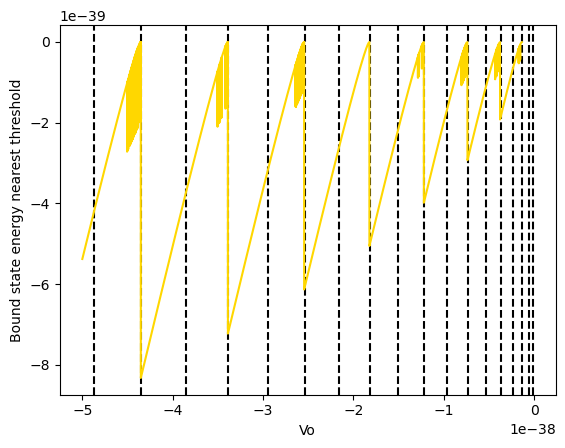

In [7]:
highest_zodd = []
for i in range(len(well_potential)-2):

#Calculate zo, z, and range to iterate over for a paticular Vo
    zo_Vo = (a/hbar)*np.sqrt(2*m*-1*(well_potential[i]))
    Erange = np.linspace(well_potential[i]+1e-40, -1e-60,s)
    def wave_l(Energy_array): #Finds an array of wave numbers k
        wave_nums = (1/hbar)*np.sqrt(2*m*(Energy_array - well_potential[i]))
        return wave_nums
    zrange = a*wave_l(Erange)
    
    
    def y_diffodd(zo):
        cot = (1/np.tan(zo))
        sqrt0 = np.sqrt((zo_Vo/zo)**2 - 1)
        diffodd = cot + sqrt0
        return diffodd  
    
#Iterate through all Vo's and find highest z -- highest eigenstate

   # if i == 0:
        #print(zrange2)
        #plt.plot(zrange2, y_diff2(zrange2), color = 'gold')
       # plt.plot(zrange, np.zeros_like(zrange), color = 'black')
   
   # if 1295 <= i <= 4000:
    #    plt.plot(zrange,y_diffodd(zrange))    
   # if i == 9245:
      #  plt.plot(zrange,y_diffodd(zrange))
    if 0 <= i <= 975:
        z_maximumodd = bisection(y_diffodd,25.5,zrange[-242])
        highest_zodd.append(z_maximumodd)
    if 976 <= i <= 1294:
        z_maximumodd = bisection(y_diffodd,25.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 1295 <= i <= 2123:
        z_maximumodd = bisection(y_diffodd,22.5,zrange[-1145])
        highest_zodd.append(z_maximumodd)
    if 2124 <= i <= 2991:
        z_maximumodd = bisection(y_diffodd,22.5,zrange[-211])
        highest_zodd.append(z_maximumodd)
    if 2992 <= i <= 3221:
        z_maximumodd = bisection(y_diffodd,22.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 3222 <= i <= 3943:
        z_maximumodd = bisection(y_diffodd,19.5,zrange[-1294])
        highest_zodd.append(z_maximumodd)
    if 3944 <= i <= 4696:
        z_maximumodd = bisection(y_diffodd,19.5,zrange[-252])
        highest_zodd.append(z_maximumodd)
    if 4697 <= i <= 4908:
        z_maximumodd = bisection(y_diffodd,19.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 4910 <= i <= 5525:
        z_maximumodd = bisection(y_diffodd,16.25,zrange[-1484])
        highest_zodd.append(z_maximumodd)
    if 5526 <= i <= 6163:
        z_maximumodd = bisection(y_diffodd,16.25,zrange[-306])
        highest_zodd.append(z_maximumodd)
    if 6164 <= i <= 6354:
        z_maximumodd = bisection(y_diffodd,16.25,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 6355 <= i <= 6865:
        z_maximumodd = bisection(y_diffodd,13.5,zrange[-1745])
        highest_zodd.append(z_maximumodd)
    if 6866 <= i <= 7389:
        z_maximumodd = bisection(y_diffodd,13.5,zrange[-390])
        highest_zodd.append(z_maximumodd)
    if 7390 <= i <= 7559:
        z_maximumodd = bisection(y_diffodd,13.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 7560 <= i <= 7967:
        z_maximumodd = bisection(y_diffodd,9.9,zrange[-2115])
        highest_zodd.append(z_maximumodd)
    if 7968 <= i <= 8379:
        z_maximumodd = bisection(y_diffodd,9.9,zrange[-515])
        highest_zodd.append(z_maximumodd)
    if 8380 <= i <= 8524:
        z_maximumodd = bisection(y_diffodd,9.9,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 8525 <= i <= 8831:
        z_maximumodd = bisection(y_diffodd,6.5,zrange[-2681])
        highest_zodd.append(z_maximumodd)
    if 8832 <= i <= 9132:
        z_maximumodd = bisection(y_diffodd,6.5,zrange[-722])
        highest_zodd.append(z_maximumodd)
    if 9133 <= i <= 9245:
        z_maximumodd = bisection(y_diffodd,6.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
    if 9246 <= i <= 9455:
        z_maximumodd = bisection(y_diffodd,3.5,zrange[-3699])
        highest_zodd.append(z_maximumodd)
    if 9456 <= i <= 9649:
        z_maximumodd = bisection(y_diffodd,3.5,zrange[-1169])
        highest_zodd.append(z_maximumodd)
    if 9650 <= i <= 9727:
        z_maximumodd = bisection(y_diffodd,3.5,zrange[-1])
        highest_zodd.append(z_maximumodd)
   # if i == 9727:
    #    print(zrange[-1])
     #   print(bisection(y_diffodd,3.5,zrange[-1]))

for c in range(len(highest_zodd)):
    if type(highest_zodd[c]) == str:
        print(c)

KinEnodd = KinEnergy(highest_zodd)
#print(KinEn)
EBSNTodd = []
for i in range(len(KinEnodd)):
    E1odd = (KinEnodd[i] + well_potential[i])
    EBSNTodd.append(E1odd)
ints = np.arange(1,19,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')
plt.plot(well_potential[0:len(EBSNTodd)], EBSNTodd, color = 'gold')
plt.xlabel('Vo')
plt.ylabel('Bound state energy nearest threshold')

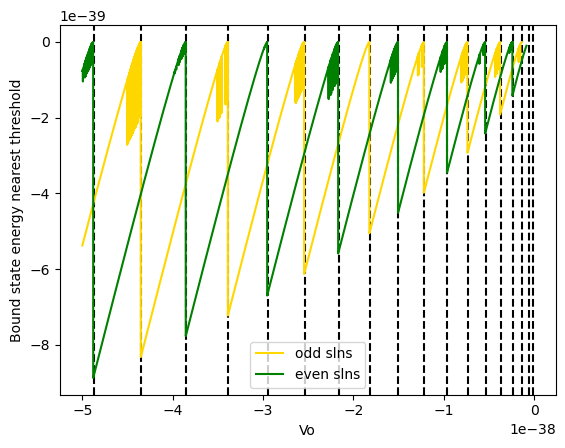

In [8]:
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')
plt.plot(well_potential[0:len(EBSNTodd)], EBSNTodd, color = 'gold', label = 'odd slns')
plt.xlabel('Vo')
plt.ylabel('Bound state energy nearest threshold')
plt.plot(well_potential[0:len(EBSNT)], EBSNT, color = 'green', label = 'even slns')
plt.legend()

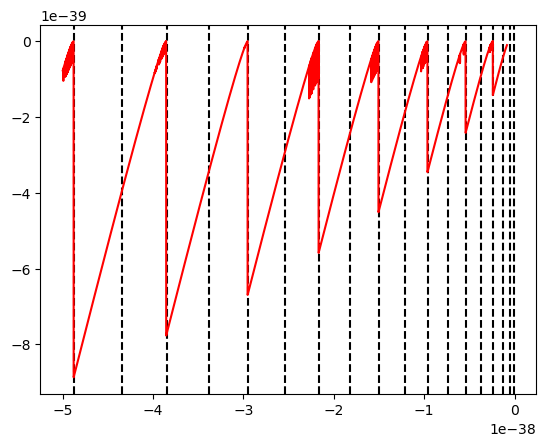

In [9]:

for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

Evenspline = scipy.interpolate.CubicSpline(well_potential[0:len(EBSNT)], EBSNT)
plt.plot(well_potential[0:len(EBSNT)], Evenspline(well_potential[0:len(EBSNT)]), label = 'even spline', color = 'red')